In [1]:
import networkx as nx
import sys
sys.path.insert(0,'../')
from Utils.plotting import addGraphPretty
from Utils.graph import bfs_iso
g = nx.erdos_renyi_graph(10, .3)


<IPython.core.display.Javascript object>


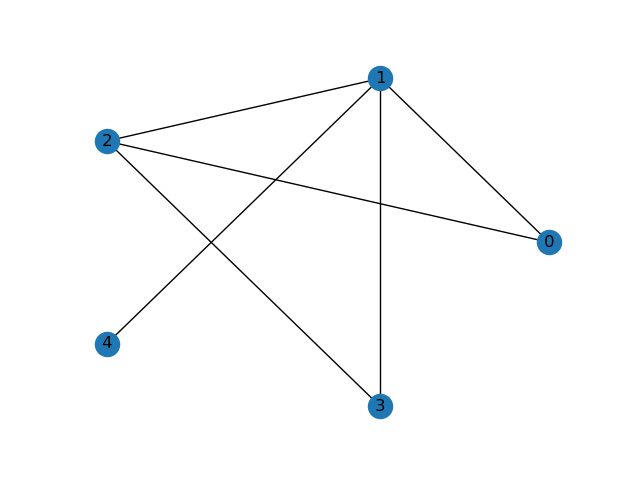

Start
{4: [1], 3: [1, 2]} {}
{1: [0], 2: [0]} {4: [1], 3: [1, 2]}
{0: [None]} {1: [0], 2: [0]}
Done
{0: [1, 2], 4: [1]} {}
{1: [3], 2: [3]} {0: [1, 2], 4: [1]}
{3: [None]} {1: [3], 2: [3]}


<IPython.core.display.Javascript object>


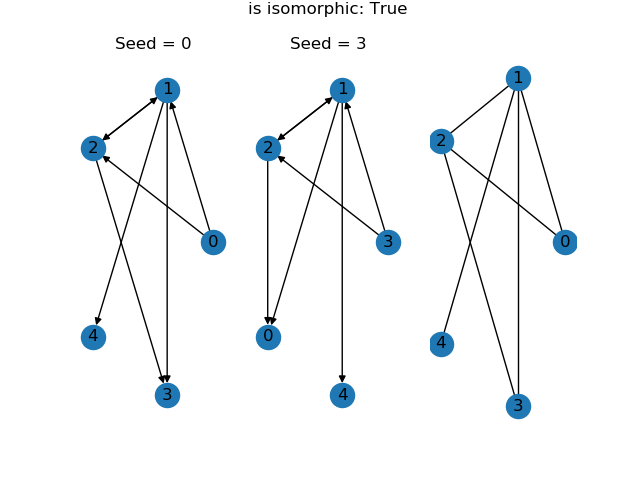

In [138]:
import matplotlib.pyplot as plt


g = nx.Graph()

g.add_edge(0,1)
g.add_edge(0,2)

g.add_edge(1,2)

g.add_edge(1,4)

g.add_edge(1,3)
g.add_edge(2,3)
# g.add_edge(3,4)

%matplotlib notebook
fig, ax = plt.subplots()
nx.draw(g, nx.circular_layout(g), with_labels = 1)
fig.show()


print('Start')
tree1 = bfs_iso(g, {0:[None]}, tree = nx.DiGraph())
print('Done')
tree2 = bfs_iso(g, {3:[None]}, nx.DiGraph())

trees = [tree1, tree2]

fig, ax = plt.subplots(1,3)

for tree, axi, l in zip(trees, ax, ['0', '3']):
    nx.draw(tree, nx.circular_layout(tree), with_labels = 1, ax = axi)
    axi.set_title(f'Seed = {l}')

mainax = fig.add_subplot(111, xticks = [], yticks = [], frameon = 0)
mainax.set_title(f'is isomorphic: {nx.is_isomorphic(*trees)}\n\n')
nx.draw(g, nx.circular_layout(g), with_labels = 1, ax = ax[-1])
fig.show()


# fig, ax = plt.subplots()
# ax.imshow(nx.adj_matrix(tree).todense())
# fig.show()



tree = nx.breadth_first_search.bfs_tree(g, 0)
# fig, ax = plt.subplots()
# nx.draw(tree, ax = ax, with_labels = 1)
# fig.show()

def construct_iso_tree(nodes, graph):
    return [bfs_iso(graph, {i:[None]}, nx.DiGraph()) for i in nodes]



{1: [0], 2: [0]} {}
{0: [None]} {1: [0], 2: [0]}
{0: [1], 2: [1]} {}
{1: [None]} {0: [1], 2: [1]}


<IPython.core.display.Javascript object>


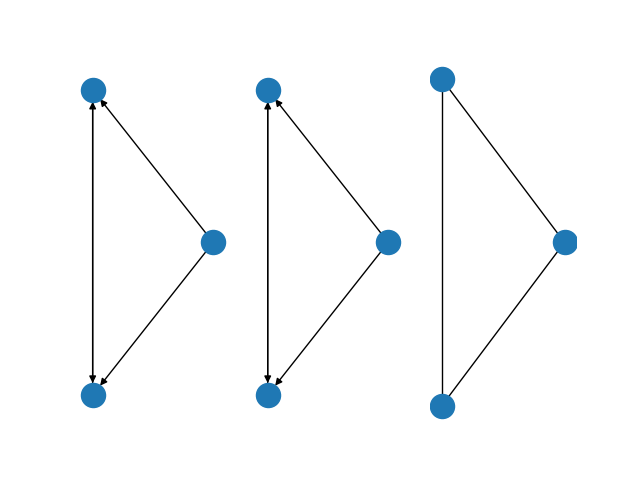

True


In [141]:
#### g = nx.Graph()
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 0)

trees = construct_iso_tree([0, 1], g)

fig, ax = plt.subplots(1, 3)

for axi, gi in zip(ax.ravel(), trees):
    nx.draw(gi, nx.circular_layout(gi), ax = axi)
nx.draw(g, nx.circular_layout(gi), ax = ax[-1])
fig.show()
print(nx.is_isomorphic(*trees))

determine [(1, 5), (3, 3)]
